## $\Large{Data\; Visualization \;(part1)}$

在Pandas教學中最後我們已經有簡單說明資料視覺化(Data Visualization)的重要性以及作了基本的練習，然而在Pandas中我們只簡單地教了大家如何繪製基本的統計圖表，但是若我們需要客製化圖表中的內容，例如增加圖形標題、在圖中增加文字、或是呈現許多子圖應該要怎麼作呢? 在資料視覺化章節的第一個部分我們將會教大家python內最廣泛被使用到的基礎繪圖套件matplotlib，雖然我們需要一步一步設定繪圖的內容而無法快速繪製完成，但這也代表任何我們想增加的內容都可客製化地作調整，另外，無論是先前的pandas以及後續會教的高階繪圖套件seaborn底層都是使用matplotlib，接下來就讓我們來看一下如何使用matplotlib吧。

### 本章節內容大綱
* [事前準備](#事前準備)
    - [載入matplotlib套件與其他相關套件](#載入matplotlib套件與其它相關套件)
    - [繪圖前的客製化設定](#繪圖前的客製化設定)
* [繪製你的第一張圖](#繪製你的第一張圖)
    - [基本繪圖模組](#基本繪圖模組)
    - [設定x軸、y軸標題與主標題](#設定x軸、y軸標題與主標題)
    - [設定色彩與線條類型](#設定色彩與線條類型)
    - [設定x軸與y軸範圍](#設定x軸與y軸範圍)
    - [加入文字與標註](#加入文字與標註)
    - [增加圖表說明](#增加圖表說明)
* [物件式導向繪圖方式](#物件式導向繪圖方式)
* [設定子圖](#設定子圖)
* [常見圖表繪製](#常見圖表繪製)
    - [直方圖](#直方圖)
    - [盒型圖](#盒型圖)
    - [長條圖](#長條圖)
    - [圓餅圖](#圓餅圖)
    - [散佈圖](#散佈圖)

## 事前準備

- ### 載入matplotlib套件與其它相關套件

In [1]:
# 載入matplotlib中的pypplot模組並且命名為plt
import matplotlib.pyplot as plt

# 由於繪圖需要資料，在此同時載入numpy套件
import numpy as np

# 額外載入rcParams函數協助我們進行繪圖的設定
from matplotlib import rcParams

%matplotlib inline

- ### 繪圖前的客製化設定

在作資料視覺化時依照需求以及環境不同我們可能會希望預先調整一些設定使得後續畫圖較為美觀，例如預先更改字體大小、線條寬度、以及設定繪圖區域的大小，此時我們可以使用rcParams去作相關的設定更改。另外我們也可以透過設定style調整繪圖的風格。

In [2]:
# 以rcParams設定圖的大小，預設值為(6.4, 4.8)，單位為英吋inches
rcParams['figure.figsize'] = (8, 6)

# 以rcParams設定字體大小，預設值為10
rcParams['font.size'] = 14

# 設定style為ggplot風格
plt.style.use('ggplot')

---
## 繪製你的第一張圖

In [3]:
# 製作要繪圖所使用的資料
x = np.arange(start=0, stop=10, step=0.1)
y = np.sin(x)

- ### 基本繪圖模組

在最簡單的狀況下，只要使用plt.plot就可以快速地繪製線圖。

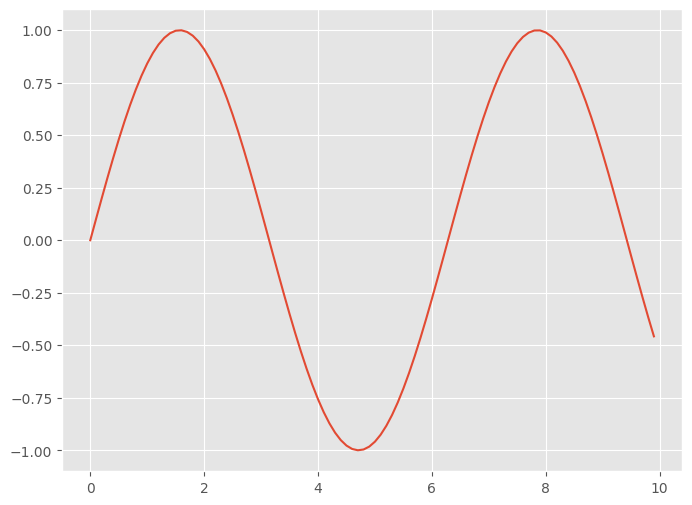

In [4]:
# 使用plt.plot繪圖
plt.plot(x, y)

# 使用plt.show()呈現這張圖
plt.show()

- ### 設定x軸、y軸標題與主標題

由於matplotlib是最底層的繪圖套件，因此我們可以彈性地增加我們需要的內容

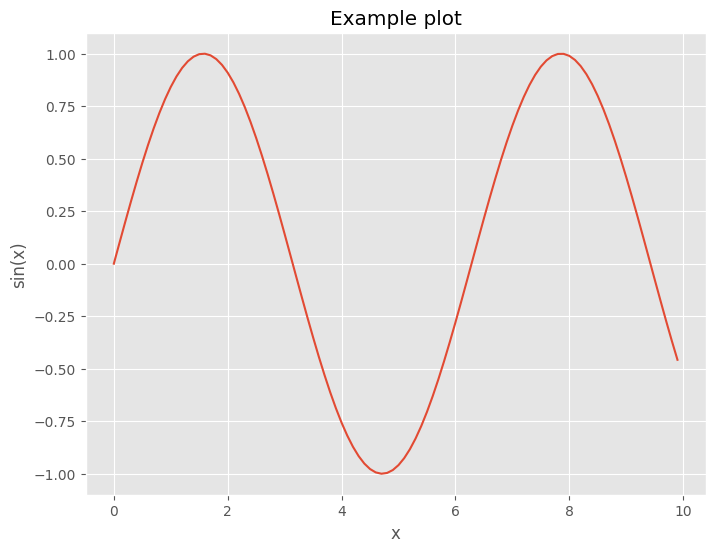

In [5]:
# 設定x軸、y軸、以及主標題的內容
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Example plot')
plt.show()

- ### 設定色彩與線條類型
在plt.plot中若我們想要更改線條的色彩與線條類型，我們可以在第三個參數位置以縮寫的方式進行設定(例如'b+'代表藍色的加號)。

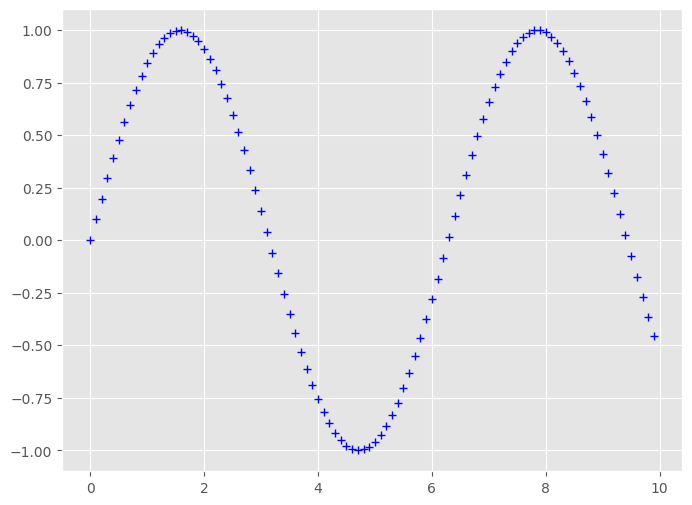

In [6]:
plt.plot(x, y, 'b+')
plt.show()

- ### 設定x軸與y軸範圍

透過xlim與ylim，我們可以彈性調整圖形的呈現範圍

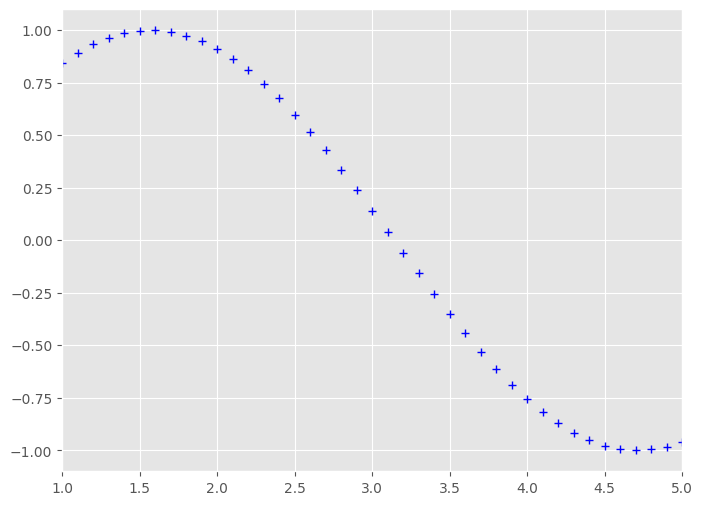

In [7]:
plt.plot(x, y, 'b+')
plt.xlim((1, 5))
plt.show()

- ### 加入文字與標註

使用text與annotate可以分別讓我們在圖上加入文字與標註

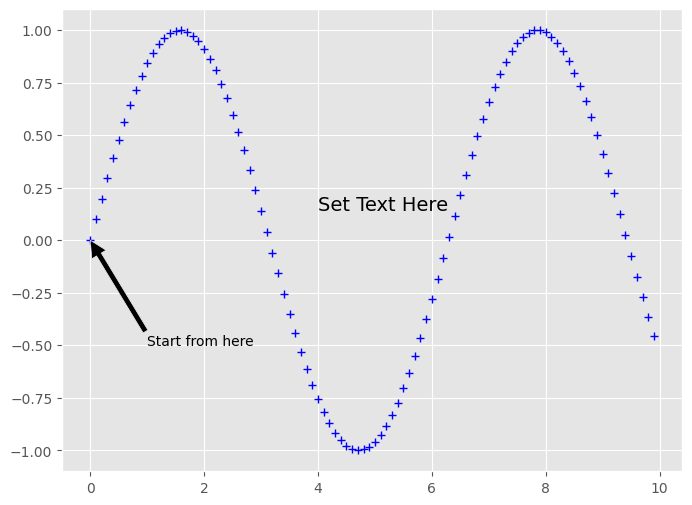

In [8]:
# 繪製圖形
plt.plot(x, y, 'b+')

# 加入標註，需要指定標註位置以及箭號屬性
plt.annotate('Start from here', xy=(0, np.sin(0)), xytext=(0+1, np.sin(0)-0.5),
             arrowprops=dict(facecolor='black'))

# 加入文字，可以使用fontsize設定字體大小
plt.text(x=3+1, y=np.sin(3), s='Set Text Here', fontsize=14)
plt.show()

- ### 增加圖表說明

若想要增加圖表說明，我們可以使用legend函數

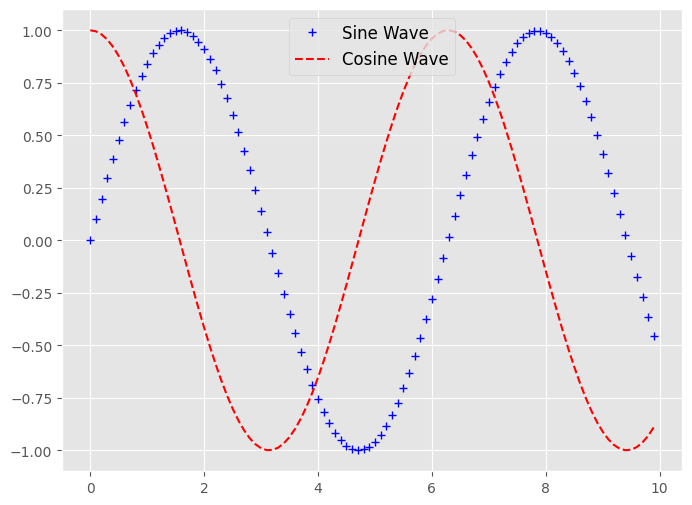

In [9]:
x = np.arange(0, 10, step=0.1)
sin_x = np.sin(x)
cos_x = np.cos(x)

# 繪製圖形，這次我們同時繪製Sin波與Cos波
plt.plot(x, sin_x, 'b+')
plt.plot(x, cos_x, 'r--')

# 加入圖表說明，並透過loc與prop設定說明的位置與字體大小
plt.legend(labels=['Sine Wave', 'Cosine Wave'],
           loc='upper center', prop={'size':12})
plt.show()

---
## 物件式導向繪圖方式

除了上述的畫圖方式外，matplotlib還有另外一種物件式導向的繪圖方式，在繪製多張圖形時非常適合使用這種方式建立你的圖形。

在以下的範例我們除了畫一張基本的圖之外也嘗試著在圖上疊一張小圖，讓大家了解我們使用物件式導向繪圖時可以做到甚麼事情。

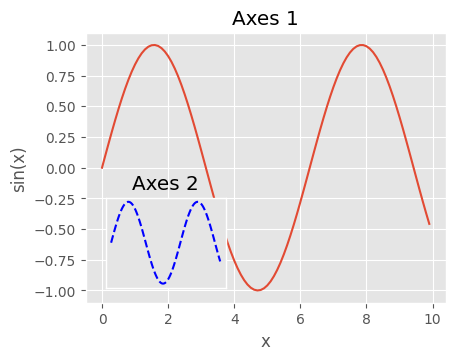

In [10]:
x = np.arange(start=0, stop=10, step=0.1)
y = np.sin(x)

# 先建立一個圖的物件，可在此指定此張圖的相關參數
fig = plt.figure(figsize=(4, 3))

# 增加一個子區域，以及設定它在圖中的位置
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9])
ax.plot(x, y)
ax.set_title('Axes 1')
ax.set_xlabel('x')
ax.set_ylabel('sin(x)')

# 再增加一個子區域，這次我們把位置設定在左下角
ax2 = fig.add_axes([0.15, 0.15, 0.3, 0.3])
ax2.plot(x, y, 'b--')

# 將x軸與y軸的標記手動取代，讓畫面比較乾淨
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Axes 2')

plt.show()

---
## 設定子圖

有時我們會需要同時觀察多張圖的資訊、或是將相關的圖形依照需求放置在同一區，雖然使用上面的方式自己設定子區域可以作到最細緻的客製化，但需要大量的程式碼才能作到這件事情。在matplotlib中也提供了另一個subbplot的功能，可以讓我們較方便的設定子圖的配置以及快速地畫出來。


<img src="./Slides_image/subplot.PNG" width=600/>

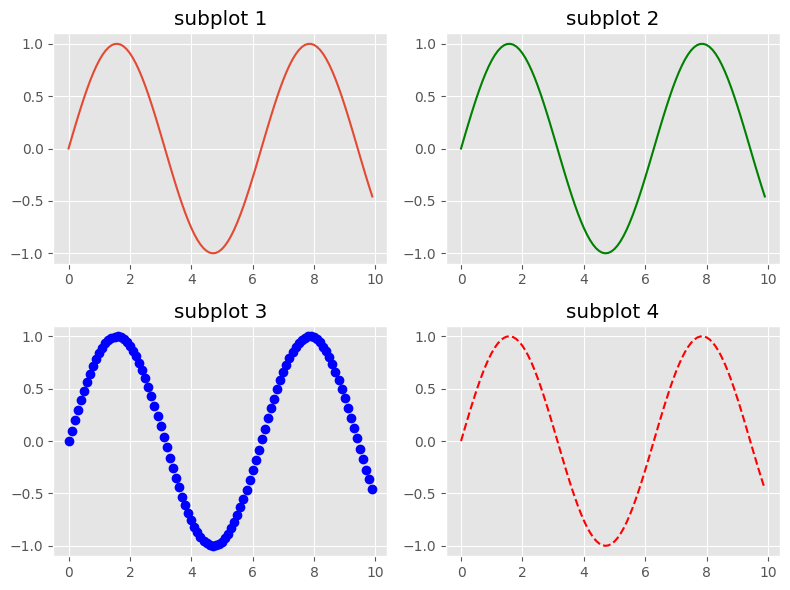

In [11]:
# 設定一張圖中有 2 x 2 張子圖，目前畫第一張(將以先列後行的方式排序)
plt.subplot(2, 2, 1)
plt.plot(x, y)
plt.title('subplot 1')

# 切換到第二張子圖作繪製
plt.subplot(2, 2, 2)
plt.plot(x, y, 'g')
plt.title('subplot 2')

# 切換到第三張子圖作繪製
plt.subplot(2, 2, 3)
plt.plot(x, y, 'bo')
plt.title('subplot 3')

# 切換到第四張子圖作繪製
plt.subplot(2, 2, 4)
plt.plot(x, y, 'r--')
plt.title('subplot 4')

# 設定子圖時有可能標題或xy軸標籤會相互重疊，在此以tight_layout作自動的調整
plt.tight_layout()
plt.show()

- ### 物件導向方式

除了上述方式外，我們同樣可以使用物件導向的方式繪製子圖。我們現在來試試看同樣用另一個方式畫出上面的圖形。

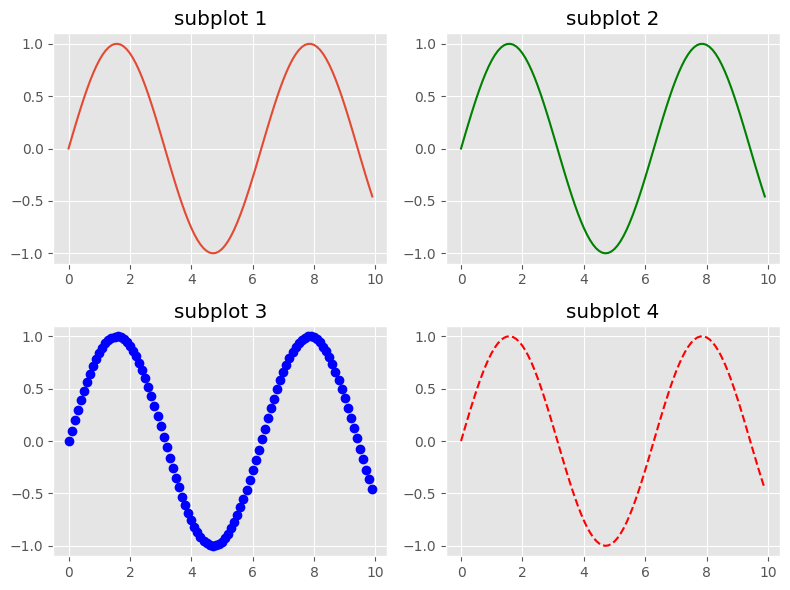

In [12]:
# 先將子圖的配置設定好
fig, ax = plt.subplots(nrows=2, ncols=2)

# 在第一張圖上作繪製
ax[0, 0].plot(x, y)
ax[0, 0].set_title('subplot 1')

# 在第二張圖上作繪製
ax[0, 1].plot(x, y, 'g')
ax[0, 1].set_title('subplot 2')

# 在第三張圖上作繪製
ax[1, 0].plot(x, y, 'bo')
ax[1, 0].set_title('subplot 3')

# 在第四張圖上作繪製
ax[1, 1].plot(x, y, 'r--')
ax[1, 1].set_title('subplot 4')

plt.tight_layout()
plt.show()

---
## 常見圖表繪製

上面我們畫的圖都是線圖或散佈圖，但matplotlib當然不只這樣! 接下來我們就來看如何畫一些常見的統計圖。

- ### 直方圖

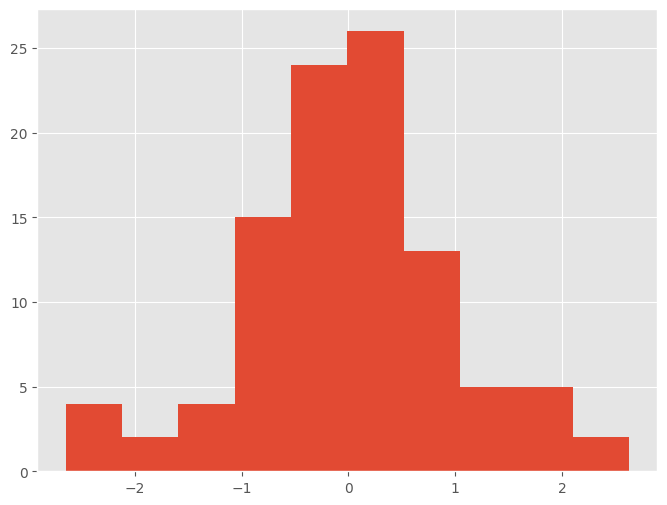

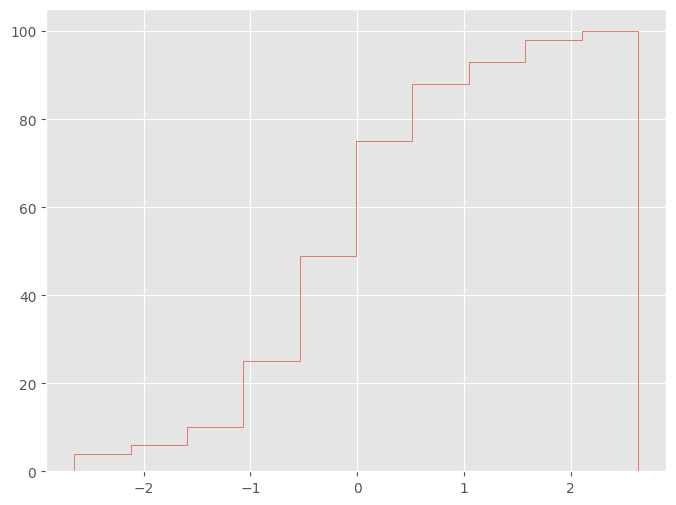

In [13]:
# 產生要繪圖使用的資料
normal_samples = np.random.normal(size=100)

# 使用plt.hist繪製直方圖
plt.hist(normal_samples)
plt.show()

# 我們也可以透過一些參數調整圖形的內容，例如只畫出直方圖的端點並且改為累積直方圖
plt.hist(normal_samples, histtype='step', cumulative=True)
plt.show()

- ### 盒型圖

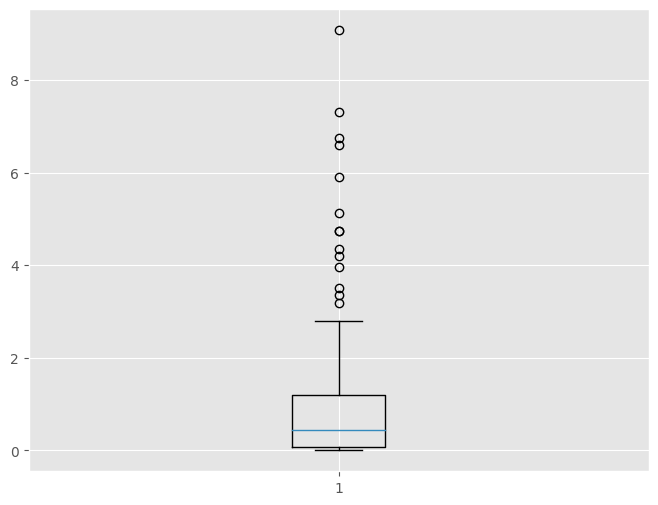

In [14]:
# 產生繪圖使用的資料
dat = np.random.randn(200) ** 2
plt.boxplot(dat)
plt.show()

- ### 長條圖

In [ ]:
# 產生繪圖要使用的資料
labels = ['Physics', 'Chemistry', 'Literature', 'Math']
x = [1, 2, 3, 4]
height = [85, 82, 93, 67]

# 依照資料畫出長條圖，並且設定顏色、寬度、與透明度
plt.bar(x, height, color='blue', width=0.5, alpha=0.5)
plt.xticks(x, labels)
plt.show()

- ### 圓餅圖

In [ ]:
# 產生繪圖要使用的資料
labels = ['Banana', 'Cherry', 'Apple', 'Orange']
frac = [0.2, 0.1, 0.4, 0.3]

plt.pie(frac, labels=labels)
plt.show()

- ### 散佈圖

In [ ]:
# 產生繪圖要使用的資料
x = np.arange(1, 10, step=0.1)
y = 3 + x*x + np.random.randn(x.shape[0]) * 10

# 畫出x與y的散佈圖，並且設定顏色和透明度
plt.scatter(x, y, c='blue', alpha=0.5)
plt.show()

### 想挑戰更多 matplotlib 的圖形可參考 [python-matplotlib-plotting-examples-and-exercises](http://gree2.github.io/python/2015/04/10/python-matplotlib-plotting-examples-and-exercises)